In [41]:
from google.colab import drive
import os

# Monta Google Drive
drive.mount('/content/drive')

# Percorso base per i notebooks Colab
base_path = '/content/drive/MyDrive/Colab Notebooks'

# Percorso completo per la cartella Big Data
big_data_path = os.path.join(base_path, 'Big Data')

# Verifica se la cartella Big Data esiste, altrimenti creala
if not os.path.exists(big_data_path):
    os.makedirs(big_data_path)
    print(f"Cartella creata: {big_data_path}")
else:
    print(f"La cartella esiste già: {big_data_path}")
    # Prova a stampare il contenuto se la cartella esiste
    try:
        print("Contenuto della cartella Big Data:")
        print(os.listdir(big_data_path))
    except:
        print("Impossibile leggere il contenuto della cartella")

# Percorso per Homework 1
homework1Path = os.path.join(big_data_path, "Homework 1")

# Verifica se la cartella Homework 1 esiste, altrimenti creala
if not os.path.exists(homework1Path):
    os.makedirs(homework1Path)
    print(f"Cartella creata: {homework1Path}")
else:
    print(f"La cartella esiste già: {homework1Path}")

#Percorso risultati
resultPath = os.path.join(homework1Path, "results")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
La cartella esiste già: /content/drive/MyDrive/Colab Notebooks/Big Data
Contenuto della cartella Big Data:
['Homework 1']
La cartella esiste già: /content/drive/MyDrive/Colab Notebooks/Big Data/Homework 1


In [25]:
output_path = os.path.join(resultPath, "plot")

#Creo la cartella se non esiste
os.makedirs(output_path, exist_ok=True)

Prima Query: Numero di studi avviati per anno

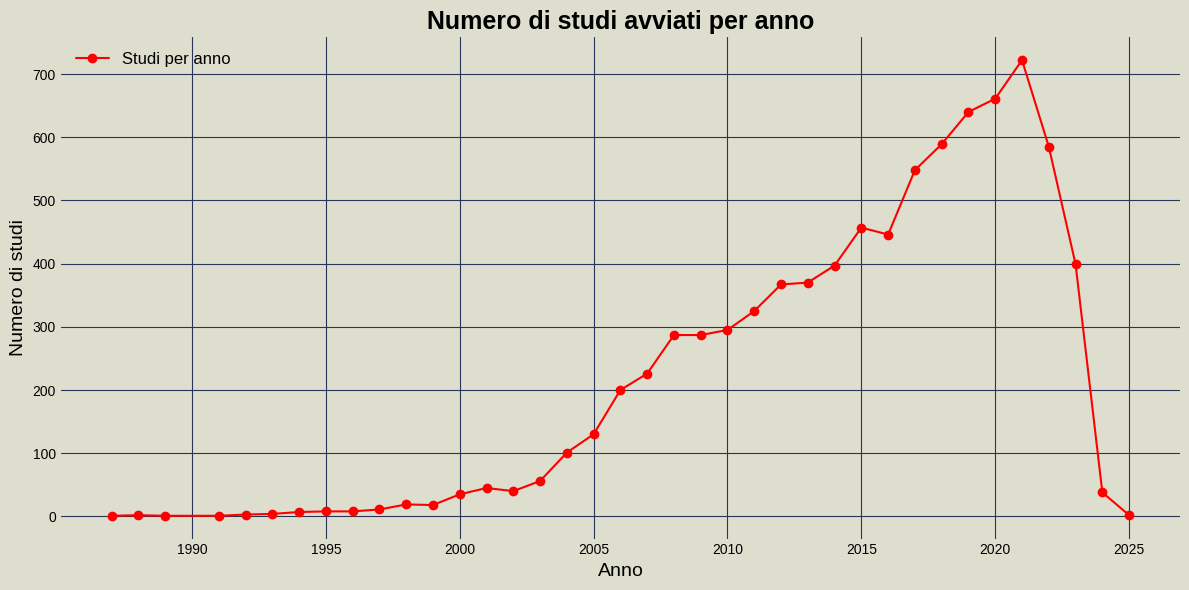

In [26]:
import pandas as pd
import bar_chart_race as bcr
import matplotlib.pyplot as plt
import urllib.request

df = pd.read_csv(resultPath+"/studiesPerYear.csv", index_col=0)
df = df.sort_values("Start Year")

# Scarica il file .mplstyle solo se non esiste già
style_url = 'https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle'
style_path = 'pitayasmoothie-dark.mplstyle'

if not os.path.exists(style_path):
    urllib.request.urlretrieve(style_url, style_path)

# Applica lo stile scaricato
plt.style.use(style_path)

# Crea la line chart
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('#dedece')  # Sfondo generale (intorno al grafico)
ax.set_facecolor('#dedece')         # Sfondo dell'area del grafico


# Titolo con font grande e bold
ax.set_title("Numero di studi avviati per anno", fontsize=18, fontweight='bold', color='black')

# Etichette degli assi
ax.set_xlabel("Anno", fontsize=14, color='black')
ax.set_ylabel("Numero di studi", fontsize=14, color='black')

# Tick degli assi
ax.tick_params(axis='x', labelsize=10, labelcolor='black')
ax.tick_params(axis='y', labelsize=10, labelcolor='black')

# Legenda personalizzata

plt.plot(df["Start Year"], df["NumStudies per Year"], marker='o', linestyle='-', color='red', label="Studi per anno")

leg = ax.legend(facecolor='#eeeeee', edgecolor='black', fontsize=12, labelcolor='black')

#salvataggio
image_file = os.path.join(output_path, "studies_per_year.png")
plt.tight_layout()
plt.savefig(image_file, dpi=300, facecolor=fig.get_facecolor())

#mostro il grafico
plt.show()

Seconda Query: Media Partecipanti per Titolo di Studio Clinico

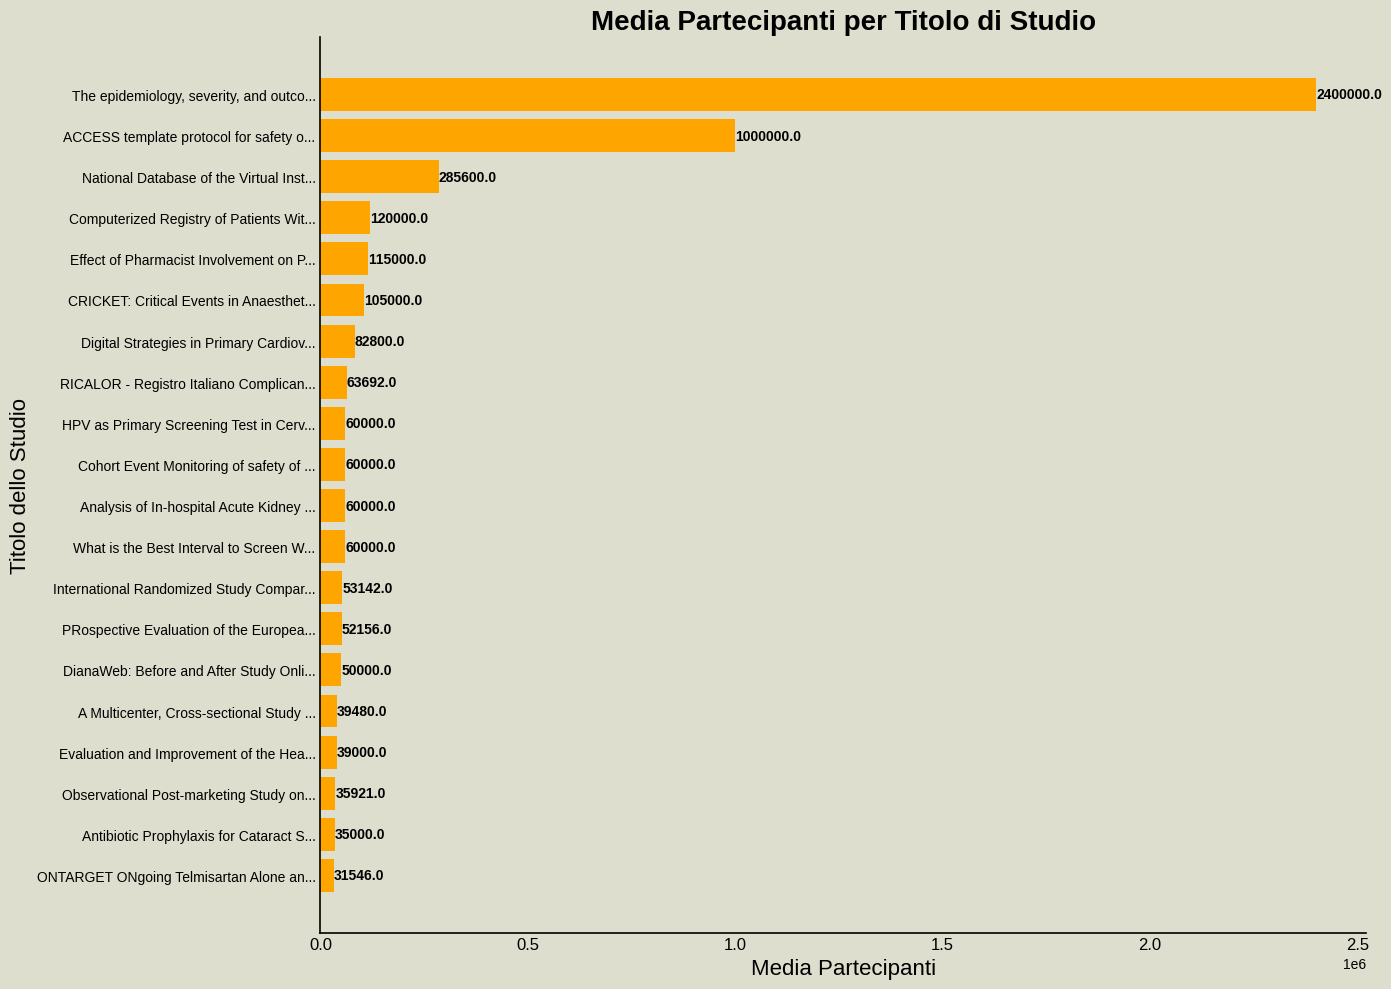

In [47]:
# Carica i dati dal CSV generato dalla query
df = pd.read_csv(os.path.join(resultPath, "averagePerTitle.csv"))

# Prendi i primi 20 titoli con il maggior numero medio di partecipanti
top_20 = df.head(20)

# Applica lo stile scaricato
plt.style.use(style_path)

# Inverti l'ordine per avere il più alto in cima
top_20 = top_20.sort_values('Average per Title')

# Troncamento dei titoli lunghi
max_len = 40  # massimo numero di caratteri per il titolo
top_20['Short Title'] = top_20['Title'].apply(lambda x: x if len(x) <= max_len else x[:max_len - 3] + '...')

# Crea la horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor('#dedece')  # Sfondo generale (intorno al grafico)
ax.set_facecolor('#dedece')         # Sfondo dell'area del grafico

# Crea il grafico a barre orizzontale
bars = ax.barh(top_20['Short Title'], top_20['Average per Title'], color='orange')

# Aggiungi i valori alla fine di ogni barra
for i, v in enumerate(top_20['Average per Title']):
    ax.text(v + 5, i, f'{v:.1f}', va='center', fontsize=10, color='black', fontweight='bold')

# Disabilita la griglia
ax.grid(False)

# Rendi visibili gli assi (bordo sinistro e inferiore)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Nascondi eventualmente gli altri bordi
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Colore e spessore (facoltativo)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

# Titolo con font grande e bold
ax.set_title("Media Partecipanti per Titolo di Studio", fontsize=20, fontweight='bold', color='black')

# Etichette degli assi
ax.set_xlabel("Media Partecipanti", fontsize=16, color='black')
ax.set_ylabel("Titolo dello Studio", fontsize=16, color='black')

# Tick degli assi
ax.tick_params(axis='x', labelsize=12, labelcolor='black')
ax.tick_params(axis='y', labelsize=10, labelcolor='black')

# Adatta le labels dell'asse y per evitare sovrapposizioni
plt.tight_layout()

# Salvataggio
image_file = os.path.join(output_path, "average_per_title.png")
plt.savefig(image_file, dpi=300, facecolor=fig.get_facecolor())

# Mostra il grafico

plt.show()

Terza query: Top 10 Condizioni Mediche più frequenti

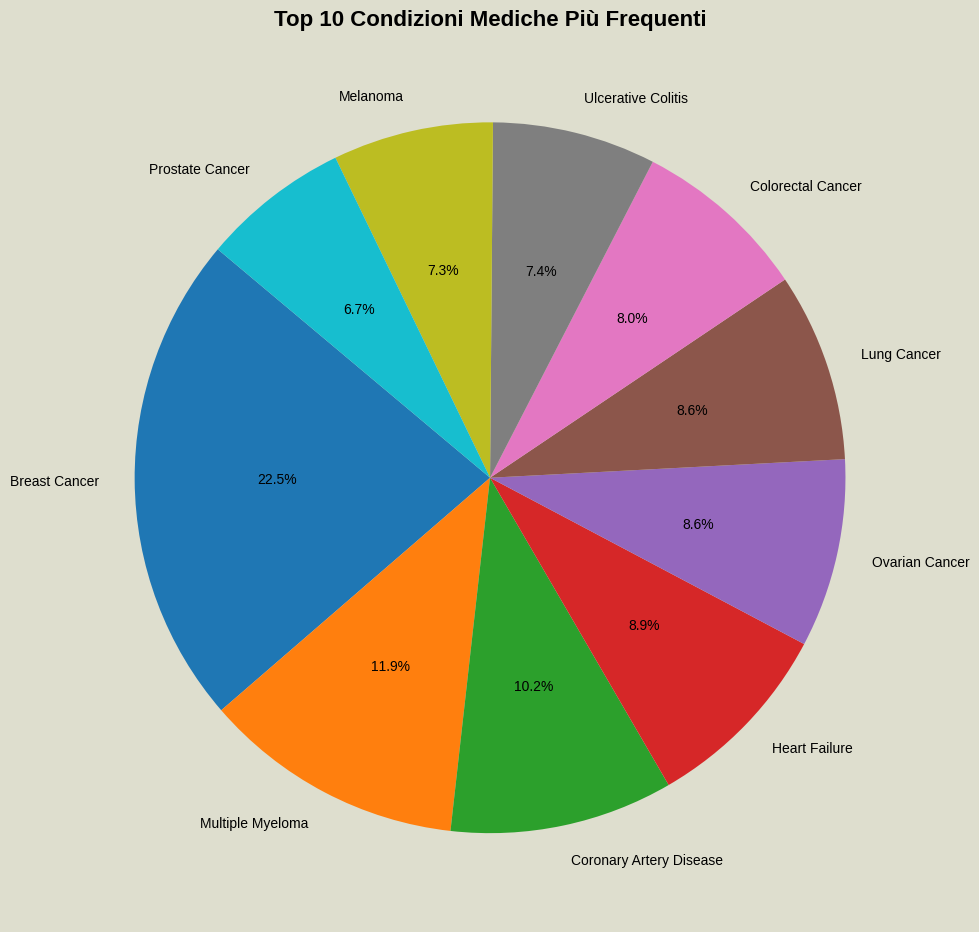

In [38]:
# Carica il CSV esportato da Spark
df = pd.read_csv(os.path.join(resultPath, "top10MedicalCondition.csv"))

# Imposta lo stile (opzionale)
plt.style.use("ggplot")  # o il tuo style_path se ne hai uno personalizzato

# Estrai i dati
labels = df['Condition']
sizes = df['Count per Condition']

# Colori personalizzati (opzionale)
colors = plt.cm.tab10.colors  # una palette con 10 colori distinti

# Crea il grafico a torta
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'color': 'black', 'fontsize': 10}
)
fig.patch.set_facecolor('#dedece')

# Titolo
ax.set_title("Top 10 Condizioni Mediche Più Frequenti", fontsize=16, fontweight='bold', color="black")

# Aggiusta l'aspetto per non tagliare etichette
plt.tight_layout()

# Salva il grafico
image_file = os.path.join(output_path, "top10_medical_condition.png")
plt.savefig(image_file, dpi=300, facecolor=fig.get_facecolor())

# Mostra il grafico
plt.show()

Quarta Analitica: Paese con la Maggior Media Partecipanti per Tipo di Studio

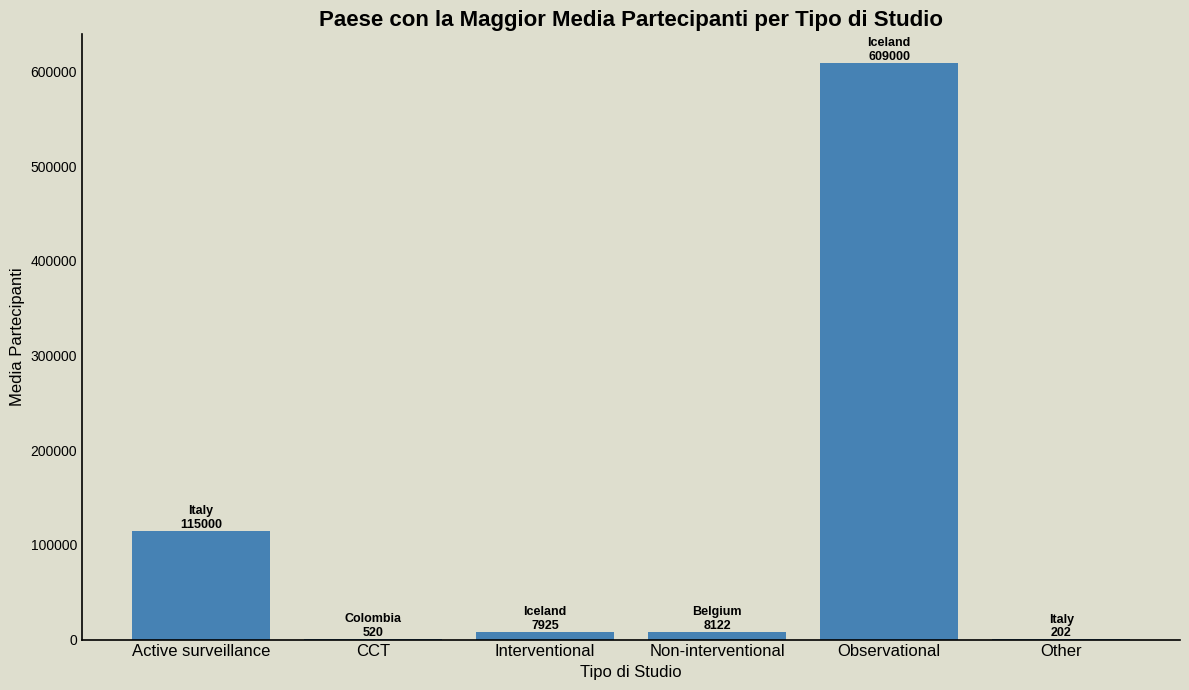

In [51]:
df = pd.read_csv(os.path.join(resultPath, "maxCountryAvgPerStudyType.csv"))

# Applica lo stile come in precedenza
plt.style.use(style_path)

# Crea il grafico
fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.bar(df["Study Type"], df["Average per Type/Country"], color='steelblue')
fig.patch.set_facecolor('#dedece')  # Sfondo generale (intorno al grafico)
ax.set_facecolor('#dedece')         # Sfondo dell'area del grafico

# Aggiungi etichette di valore e paese sopra ogni barra
for i, (val, country) in enumerate(zip(df["Average per Type/Country"], df["Country"])):
    ax.text(i, val + 5, f"{country}\n{val:.0f}", ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')

# Titolo e assi
ax.set_title("Paese con la Maggior Media Partecipanti per Tipo di Studio", fontsize=16, fontweight='bold', color='black')
ax.set_ylabel("Media Partecipanti", fontsize=12, color='black')
ax.set_xlabel("Tipo di Studio", fontsize=12, color='black')


# Rimozione griglia + personalizzazione
ax.grid(False)
# Nascondi eventualmente gli altri bordi
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Colore e spessore (facoltativo)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

# Tick degli assi
ax.tick_params(axis='x', labelsize=12, labelcolor='black')
ax.tick_params(axis='y', labelsize=10, labelcolor='black')

plt.tight_layout()

image_file = os.path.join(output_path, "maxCountryAvgPerStudyType_barchart.png")
plt.savefig(image_file, dpi=300, facecolor=fig.get_facecolor())
plt.show()

Sesta Analitica

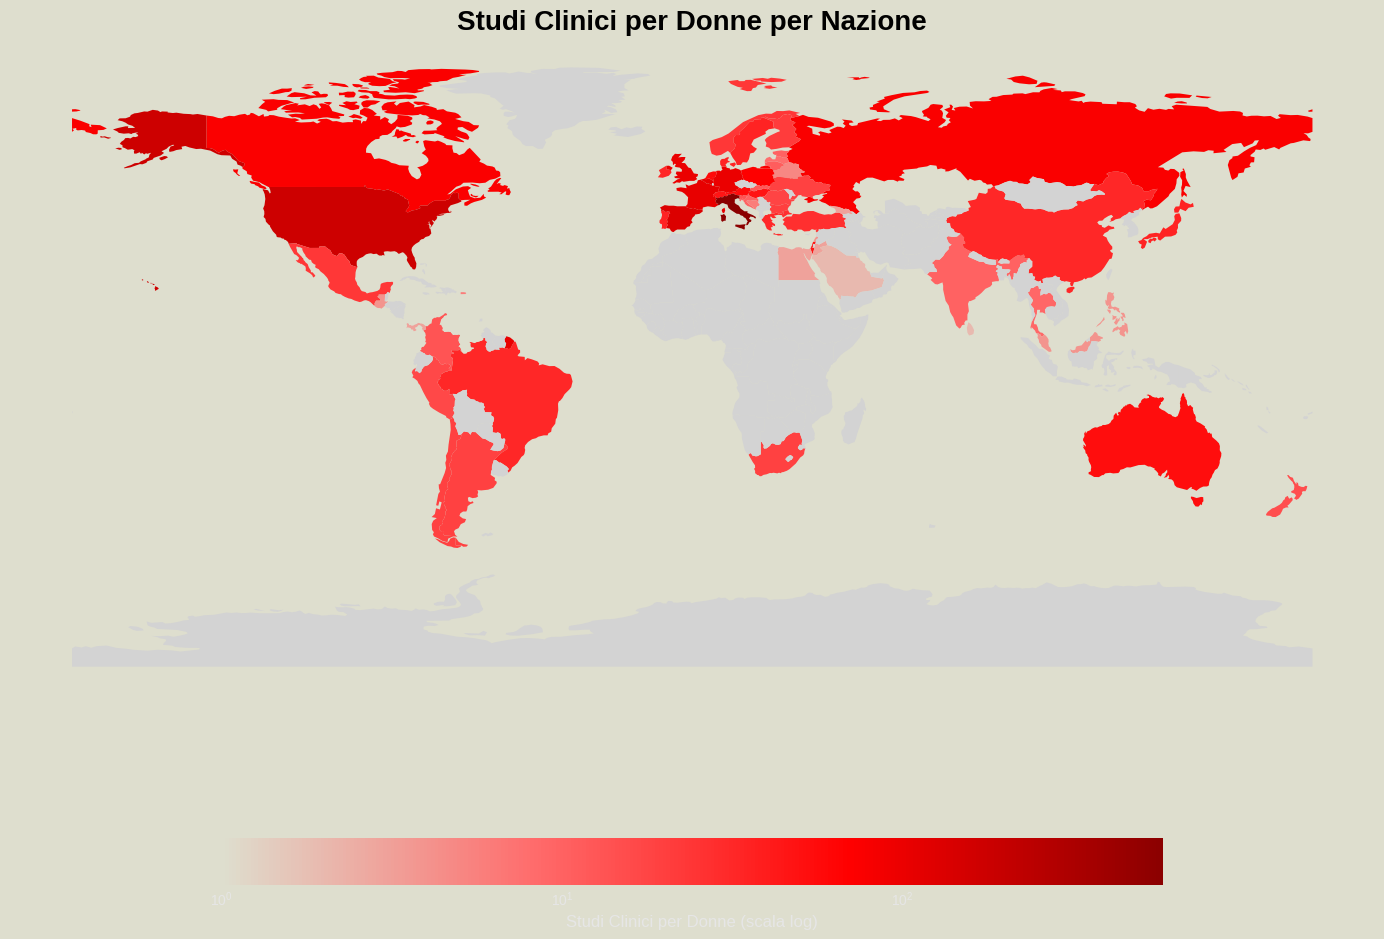

In [63]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, LogNorm
import urllib.request
import os
import numpy as np

# Caricamento dati
df = pd.read_csv(os.path.join(resultPath, "6_nationSponsorWomen.csv"))

# Correzione nomi duplicati
aggregazioni = {
    'United States': 'United States of America',
    'Russian Federation': 'Russia',
    'Czechia': 'Czech Republic',
    'Macedonia, The Former Yugoslav Republic of': 'North Macedonia',
    'Holy See (Vatican City State)': 'Vatican City',
    'South Korea': 'Korea, Republic of',
    'Swaziland': 'Eswatini',
    'Brunei Darussalam': 'Brunei',
    'Taiwan': 'Taiwan, Province of China'
}
df['Nation'] = df['Nation'].replace(aggregazioni)
df = df.groupby('Nation', as_index=False).sum()

# Caricamento mappa geopandas
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# Uniforma nomi e semplifica geometrie per performance
world = world.rename(columns={'ADMIN': 'Nation_Mapped'})
world['geometry'] = world['geometry'].simplify(0.05)

# Merge dati
df['Nation_Mapped'] = df['Nation']
merged = world.set_index('Nation_Mapped').join(df.set_index('Nation_Mapped'))

# Colormap e normalizzazione logaritmica
cmap = LinearSegmentedColormap.from_list("custom_cmap", ['#dedece', '#ff6b6b', '#ff0000', '#8b0000'])
# Gestisci i valori zero per la normalizzazione logaritmica in modo più robusto
non_zero_female_studies = df['NumFemaleStudies per Nation'][df['NumFemaleStudies per Nation'] > 0]
vmin = non_zero_female_studies.min() if not non_zero_female_studies.empty else 1 # Imposta un valore minimo predefinito se tutti sono zero
norm = LogNorm(vmin=vmin, vmax=df['NumFemaleStudies per Nation'].max())

# Stile
plt.style.use(style_path)

# Plot
fig, ax = plt.subplots(figsize=(16, 10))
fig.patch.set_facecolor('#dedece')
ax.set_facecolor('#dedece')

merged.plot(
    column='NumFemaleStudies per Nation',
    ax=ax,
    cmap=cmap,
    norm=norm,
    legend=True,
    missing_kwds={'color': 'lightgrey', 'label': 'Nessun dato'},
    legend_kwds={'label': "Studi Clinici per Donne (scala log)", 'orientation': "horizontal", 'shrink': 0.6}
)

# Titolo
ax.set_title("Studi Clinici per Donne per Nazione", fontsize=20, fontweight='bold', color='black')
ax.axis('off')

# Riproiezione per calcolare centroidi accurati
world_proj = world.to_crs(epsg=3857) # Usa un sistema di coordinate proiettato comune (Web Mercator)

# Salvataggio
plt.tight_layout()
image_file = os.path.join(output_path, "female_studies_map.png")
plt.savefig(image_file, dpi=300, facecolor=fig.get_facecolor())

plt.show()


Settima Analitica

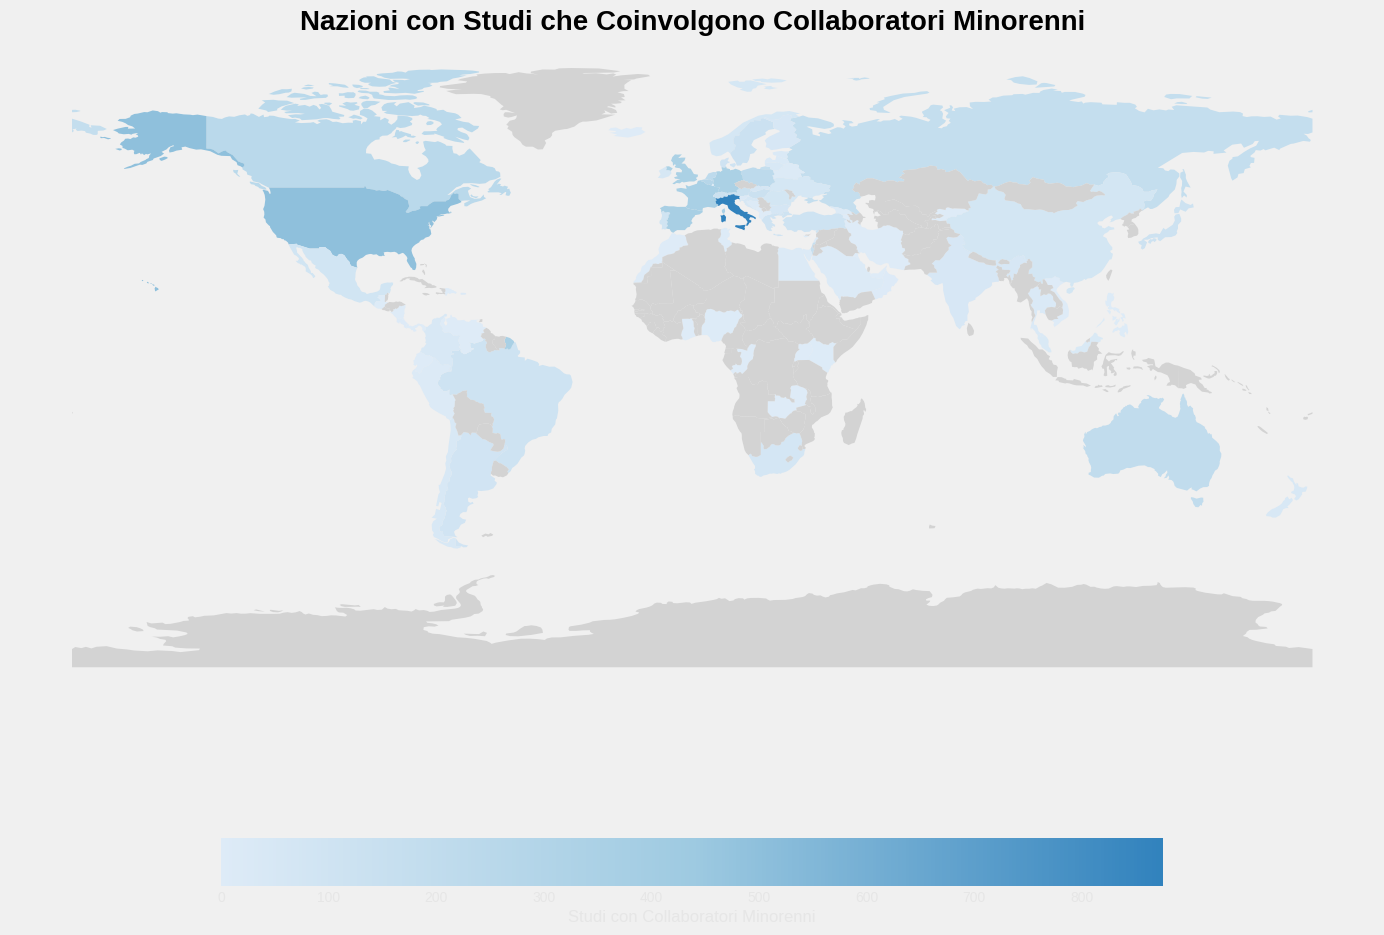

In [64]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
import urllib.request
import os
import numpy as np

# Caricamento dati dal CSV che hai creato
df = pd.read_csv(os.path.join(resultPath, "7_nationMinorsCollaborators.csv"))
df = df.rename(columns={'Country': 'Nation', 'Count of Studies per Country': 'NumStudiesWithMinors'})

# Correzione nomi duplicati (mantieni quelle che avevi già)
aggregazioni = {
    'United States': 'United States of America',
    'Russian Federation': 'Russia',
    'Czechia': 'Czech Republic',
    'Macedonia, The Former Yugoslav Republic of': 'North Macedonia',
    'Holy See (Vatican City State)': 'Vatican City',
    'South Korea': 'Korea, Republic of',
    'Swaziland': 'Eswatini',
    'Brunei Darussalam': 'Brunei',
    'Taiwan': 'Taiwan, Province of China'
}
df['Nation'] = df['Nation'].replace(aggregazioni)
df = df.groupby('Nation', as_index=False).sum() # Raggruppa nuovamente dopo la correzione dei nomi

# Caricamento mappa geopandas
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# Uniforma nomi e semplifica geometrie per performance
world = world.rename(columns={'ADMIN': 'Nation_Mapped'})
world['geometry'] = world['geometry'].simplify(0.05)

# Merge dati
df['Nation_Mapped'] = df['Nation']
merged = world.set_index('Nation_Mapped').join(df.set_index('Nation_Mapped'))

# Colormap e normalizzazione (lineare in questo caso, potresti usare LogNorm se la distribuzione è molto sbilanciata)
cmap = LinearSegmentedColormap.from_list("custom_cmap", ['#deebf7', '#9ecae1', '#3182bd'])
norm = Normalize(vmin=0, vmax=df['NumStudiesWithMinors'].max()) # Assumiamo che 0 sia un valore valido

# Stile
plt.style.use(style_path)

# Plot
fig, ax = plt.subplots(figsize=(16, 10))
fig.patch.set_facecolor('#f0f0f0') # Un colore di sfondo leggermente diverso
ax.set_facecolor('#f0f0f0')

merged.plot(
    column='NumStudiesWithMinors',
    ax=ax,
    cmap=cmap,
    norm=norm,
    legend=True,
    missing_kwds={'color': 'lightgrey', 'label': 'Nessun dato'},
    legend_kwds={'label': "Studi con Collaboratori Minorenni", 'orientation': "horizontal", 'shrink': 0.6}
)

# Titolo
ax.set_title("Nazioni con Studi che Coinvolgono Collaboratori Minorenni", fontsize=20, fontweight='bold', color='black')
ax.axis('off')


# Salvataggio
plt.tight_layout()
image_file = os.path.join(output_path, "minors_collaborators_map.png")
plt.savefig(image_file, dpi=300, facecolor=fig.get_facecolor())

plt.show()

Ottava Analitica

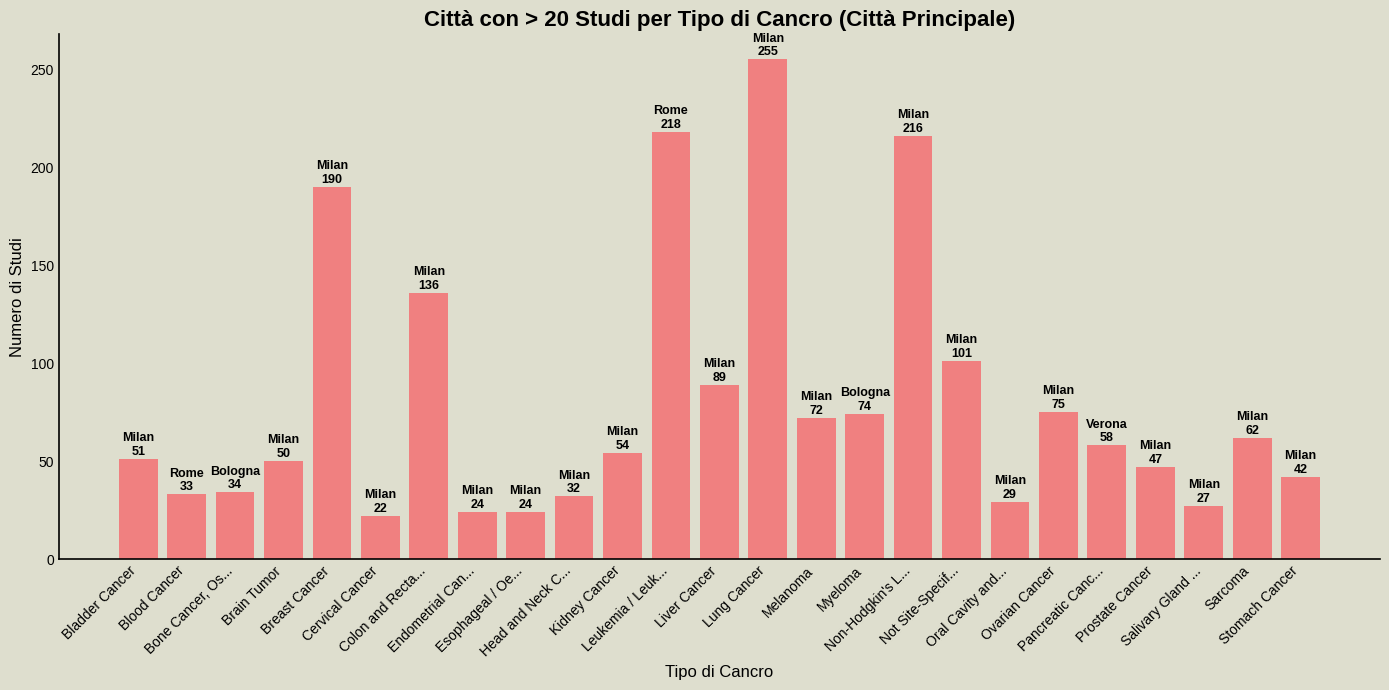

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns # Per una migliore gestione dei colori

df = pd.read_csv(os.path.join(resultPath, "8_topCityCancer.csv"))

# Ordina i dati per numero di studi decrescente all'interno di ciascun tipo di cancro
df_sorted = df.sort_values(by=['Cancer Type', 'NumStudies per City/Cancer'], ascending=[True, False])

# Prendi la prima città (con il maggior numero di studi) per ogni tipo di cancro
df_top_city_per_cancer = df_sorted.groupby('Cancer Type').first().reset_index()

# Soglia per visualizzare le barre
soglia = 20 # Imposta la tua soglia desiderata

# Filtra il DataFrame in base alla soglia
df_filtered = df_top_city_per_cancer[df_top_city_per_cancer['NumStudies per City/Cancer'] > soglia].copy() # Usa .copy() per evitare Warning

# Limita la lunghezza dei nomi dei tipi di cancro
max_len = 15
df_filtered['Cancer Type Abbreviated'] = df_filtered['Cancer Type'].apply(lambda x: x[:max_len] + '...' if len(x) > max_len else x)

# Applica lo stile
plt.style.use(style_path)

# Crea il grafico
fig, ax = plt.subplots(figsize=(14, 7)) # Aumenta la larghezza per ospitare meglio le etichette
bar_color = 'lightcoral'  # Nuovo colore per le barre
bars = ax.bar(df_filtered["Cancer Type Abbreviated"], df_filtered["NumStudies per City/Cancer"], color=bar_color)
fig.patch.set_facecolor('#dedece')   # Sfondo generale
ax.set_facecolor('#dedece')         # Sfondo dell'area del grafico

# Aggiungi etichette di valore e città sopra ogni barra
for bar, city, val in zip(bars, df_filtered["City"], df_filtered["NumStudies per City/Cancer"]):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{city}\n{int(val)}", ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')

# Titolo e assi
ax.set_title(f"Città con > {soglia} Studi per Tipo di Cancro (Città Principale)", fontsize=16, fontweight='bold', color='black')
ax.set_ylabel("Numero di Studi", fontsize=12, color='black')
ax.set_xlabel("Tipo di Cancro", fontsize=12, color='black')

# Rimozione griglia + personalizzazione bordi
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

# Tick degli assi
ax.tick_params(axis='y', labelsize=10, labelcolor='black')
plt.xticks(rotation=45, ha='right', fontsize=10, color='black') # Riduzione fontsize per più leggibilità

plt.tight_layout()

image_file = os.path.join(output_path, "top_city_cancer_barchart.png")
plt.savefig(image_file, dpi=300, facecolor=fig.get_facecolor())
plt.show()